In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans 

In [61]:
df=pd.read_csv('Laundry_Data.csv')

In [48]:
#df.info()
df

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,NaN,moderate,NaN,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,NaN,short_sleeve,blue_jeans,long,NaN,6,9,no
2,3,19/10/2015,20:58:31,malay,female,NaN,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,NaN,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,NaN,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,09/12/2015,20:05:46,malay,female,moderate,45.0,NaN,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no
803,804,09/12/2015,20:33:01,malay,male,fat,34.0,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no
804,805,09/12/2015,20:37:01,malay,female,moderate,53.0,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes
805,806,09/12/2015,20:42:57,indian,female,moderate,37.0,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no


In [49]:
#age range clean(mean value)
df['Age_Range']=df['Age_Range'].fillna(round(df['Age_Range'].mean()))

df["With_Kids"] = np.where(df["Kids_Category"]!='no_kids',df['With_Kids'],'no')
df["With_Kids"] = np.where(df["Kids_Category"]=='no_kids',df['With_Kids'],'yes')

df["Kids_Category"] = np.where(df["With_Kids"]=='yes',df['Kids_Category'],'no_kids')
#df=df.fillna('Unknown')

In [50]:
len(df[df.isnull().any(axis=1)])/len(df)*100

60.84262701363073

In [51]:
df.isnull().sum()

No                0
Date              0
Time              0
Race             55
Gender           91
Body_Size        98
Age_Range         0
With_Kids         0
Kids_Category    30
Basket_Size      55
Basket_colour    90
Attire           31
Shirt_Colour     87
shirt_type       37
Pants_Colour      5
pants_type       95
Wash_Item        89
Washer_No         0
Dryer_No          0
Spectacles        0
dtype: int64

In [52]:
print('Race\n',df['Race'].value_counts())
print('Gender\n',df['Gender'].value_counts())
print('Body_Size\n',df['Body_Size'].value_counts())
print('With_Kids\n',df['With_Kids'].value_counts())
print('Kids_Category\n',df['Kids_Category'].value_counts())



Race
 indian        227
malay         222
chinese       221
foreigner      82
Name: Race, dtype: int64
Gender
 female    361
male      355
Name: Gender, dtype: int64
Body_Size
 fat         247
moderate    237
thin        225
Name: Body_Size, dtype: int64
With_Kids
 no     603
yes    204
Name: With_Kids, dtype: int64
Kids_Category
 no_kids     603
young        90
toddler      47
baby         36
toddler       1
Name: Kids_Category, dtype: int64


count    807.000000
mean      42.040892
std        7.758262
min       28.000000
25%       36.000000
50%       42.000000
75%       49.000000
max       55.000000
Name: Age_Range, dtype: float64


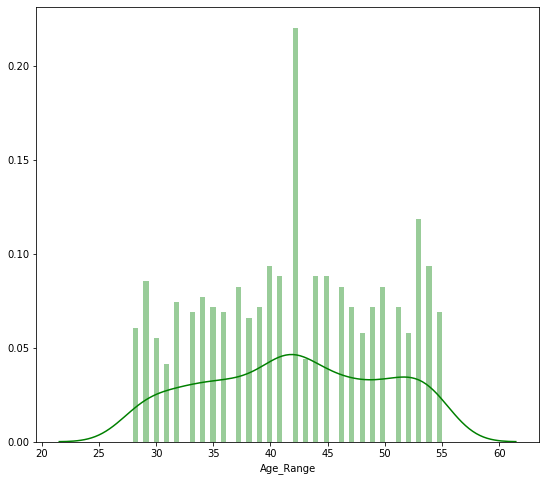

In [53]:
print(df['Age_Range'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Age_Range'], color='g', bins=60, hist_kws={'alpha': 0.4});

In [54]:
df.describe()

,No,Age_Range,Washer_No,Dryer_No
count,807.000000,807.000000,807.000000,807.000000
mean,404.000000,42.040892,4.465923,8.418835
std,233.105126,7.758262,1.152628,1.142694
min,1.000000,28.000000,3.000000,7.000000
25%,202.500000,36.000000,3.000000,7.000000
50%,404.000000,42.000000,4.000000,8.000000
75%,605.500000,49.000000,6.000000,9.000000
max,807.000000,55.000000,6.000000,10.000000


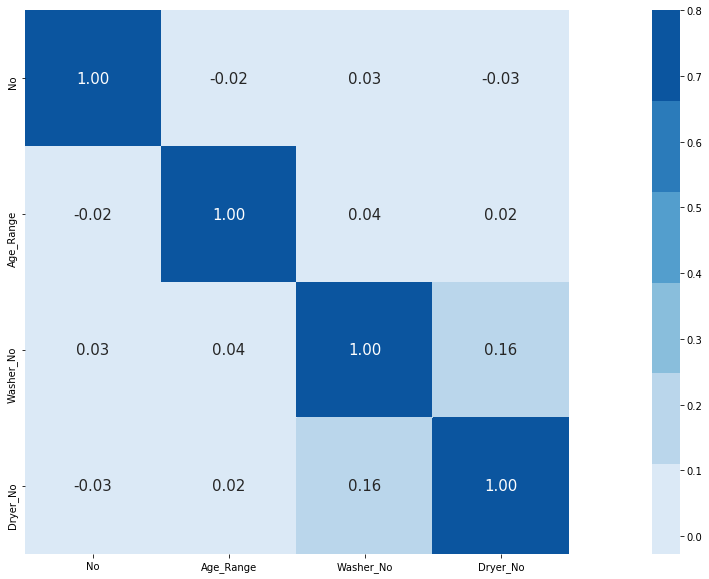

In [55]:
plt.figure(figsize=(30,10))
c= df.corr()
sns.heatmap(c, vmax=.8, square=True, annot=True, fmt='.2f', annot_kws={'size':15}, cmap=sns.color_palette("Blues") )

In [62]:
def fill_null_val(df):
    return df.fillna('Unknown')

def change_to_date(df):
    date=pd.to_datetime(df['Date'], infer_datetime_format=True)
    return df.assign(Date=date)

def change_to_time(df):
    time=pd.to_datetime(df['Time'], infer_datetime_format=True)
    time=pd.DatetimeIndex(time).time
    return df.assign(Time=time)

def get_day_col(df):
    dayCol=pd.DatetimeIndex(df['Date']).day
    return df.assign(Day=dayCol)

def get_month_col(df):
    monthCol=pd.DatetimeIndex(df['Date']).month
    return df.assign(Month=monthCol)

def fill_age(df):
    age=df['Age_Range'].fillna(round(df['Age_Range'].mean()))
    age=age.astype('int64') 
    return df.assign(Age_Range=age)

def fill_withKids_yes(df):
    with_kids = np.where(df["Kids_Category"]=='no_kids',df['With_Kids'],'yes')
    return df.assign(With_Kids=with_kids)

def drop_no(df):
    return df.drop('No',axis=1)

def get_time_of_day(df):
    timeOfDay=pd.cut(pd.DatetimeIndex(df['Time']).hour, bins=[-1,4,11,15,19,23], labels=["Midnight","Morning", "Afternoon", "Evening","Night"])
    return df.assign(Time_Of_Day=timeOfDay)




def fill_withKids_no(df):
    with_kids = np.where(df["Kids_Category"]!='no_kids',df['With_Kids'],'no')
    return df.assign(With_Kids=with_kids)

def mark_washer(df):
    washer = df['Washer_No'].apply(lambda x: "{}{}".format('W_', x))
    return df.assign(Washer_No=washer)

def mark_dryer(df):
    dryer = df['Dryer_No'].apply(lambda x: "{}{}".format('D_', x))
    return df.assign(Dryer_No=dryer)

def mark_shirt(df):
    shirt = df['shirt_type'].apply(lambda x: "{}{}".format('S_', x))
    return df.assign(shirt_type=shirt)

def mark_pants(df):
    pants = df['pants_type'].apply(lambda x: "{}{}".format('P_', x))
    return df.assign(pants_type=pants)

def drop_arm(df):
    return df.drop(columns=['Date','Time','Age_Range','Race','Gender','Body_Size','With_Kids','Kids_Category','Spectacles'])

In [64]:
df1=(df.pipe(change_to_date)
        .pipe(get_day_col)
        .pipe(get_month_col)
        .pipe(fill_age)
        .pipe(fill_withKids_yes)
        .pipe(fill_withKids_no)
        .pipe(drop_no)
        .pipe(fill_null_val)
        .pipe(get_time_of_day)
        
    )



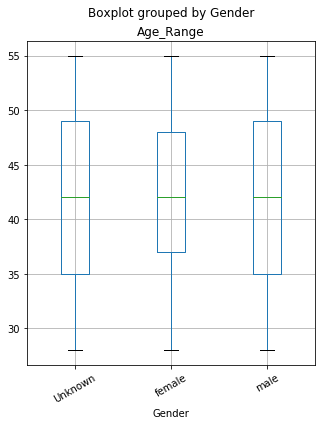

In [30]:
df.boxplot('Age_Range','Gender',rot = 30,figsize=(5,6))

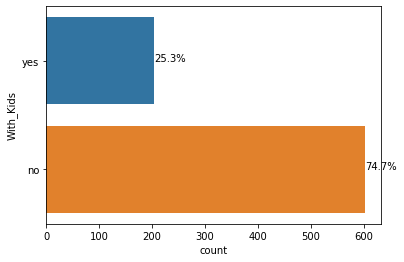

In [14]:
ax=sns.countplot(data = df, y = 'With_Kids')
total = len(df['With_Kids'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [15]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df



,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Day,Month,month
0,2015-10-19,20:17:50,malay,Unknown,moderate,42,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,19,10,10
1,2015-10-19,20:28:42,indian,male,thin,32,no,no_kids,big,green,...,short_sleeve,blue_jeans,long,Unknown,6,9,no,19,10,10
2,2015-10-19,20:58:31,malay,female,Unknown,30,no,no_kids,big,blue,...,short_sleeve,black,long,Unknown,4,10,no,19,10,10
3,2015-10-19,21:31:28,indian,male,thin,51,no,no_kids,Unknown,black,...,short_sleeve,yellow,short,clothes,5,9,no,19,10,10
4,2015-10-19,21:40:28,indian,male,moderate,34,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,19,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2015-12-09,20:05:46,malay,female,moderate,45,no,no_kids,small,white,...,long sleeve,black,long,clothes,3,10,no,9,12,12
803,2015-12-09,20:33:01,malay,male,fat,34,no,no_kids,big,grey,...,short_sleeve,black,long,blankets,3,7,no,9,12,12
804,2015-12-09,20:37:01,malay,female,moderate,53,no,no_kids,big,purple,...,long sleeve,pink,long,clothes,3,7,yes,9,12,12
805,2015-12-09,20:42:57,indian,female,moderate,37,no,no_kids,big,green,...,short_sleeve,black,long,clothes,6,10,no,9,12,12


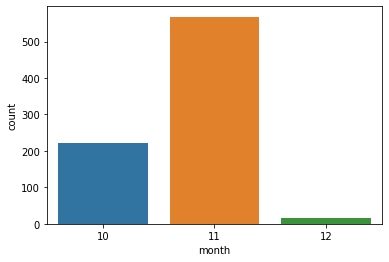

In [16]:
ax=sns.countplot(data = df, x = 'month')
total = len(df['month'])


In [17]:
df.month.unique()

array([10, 11, 12], dtype=int64)

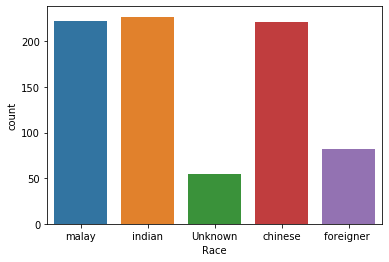

In [18]:
ax=sns.countplot(data = df, x = 'Race')
total = len(df['Race'])

In [19]:
## clustering 
##'Race','Gender' imma remove

In [72]:
cluster_select=['Gender','Body_Size','Age_Range','With_Kids','Kids_Category','Basket_Size','Attire','shirt_type','Pants_Colour','pants_type','Wash_Item','Washer_No','Dryer_No', 'Time_Of_Day']
def select_cluster(df):
    return df[cluster_select]

In [73]:
def bin_age(df):
    age_group= pd.cut(x=df['Age_Range'], bins=[20, 30, 40, 50,60])
    return df.assign(Age_Group=age_group)

In [74]:


cluster=(df.pipe(change_to_date)
        .pipe(fill_age)
        .pipe(fill_withKids_yes)
        .pipe(fill_withKids_no)
        .pipe(fill_null_val)
        .pipe(get_time_of_day)
        .pipe(select_cluster)
        .pipe(bin_age) 
        
    )

cluster.info()
cluster

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Gender         807 non-null    object  
 1   Body_Size      807 non-null    object  
 2   Age_Range      807 non-null    int64   
 3   With_Kids      807 non-null    object  
 4   Kids_Category  807 non-null    object  
 5   Basket_Size    807 non-null    object  
 6   Attire         807 non-null    object  
 7   shirt_type     807 non-null    object  
 8   Pants_Colour   807 non-null    object  
 9   pants_type     807 non-null    object  
 10  Wash_Item      807 non-null    object  
 11  Washer_No      807 non-null    int64   
 12  Dryer_No       807 non-null    int64   
 13  Time_Of_Day    807 non-null    category
 14  Age_Group      807 non-null    category
dtypes: category(2), int64(3), object(10)
memory usage: 84.1+ KB


,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Attire,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Time_Of_Day,Age_Group
0,Unknown,moderate,42,yes,young,big,casual,short_sleeve,black,short,clothes,3,10,Night,"(40, 50]"
1,male,thin,32,no,no_kids,big,casual,short_sleeve,blue_jeans,long,Unknown,6,9,Night,"(30, 40]"
2,female,Unknown,30,no,no_kids,big,casual,short_sleeve,black,long,Unknown,4,10,Night,"(20, 30]"
3,male,thin,51,no,no_kids,Unknown,casual,short_sleeve,yellow,short,clothes,5,9,Night,"(50, 60]"
4,male,moderate,34,no,no_kids,big,casual,short_sleeve,white,long,clothes,3,9,Night,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,female,moderate,45,no,no_kids,small,casual,long sleeve,black,long,clothes,3,10,Night,"(40, 50]"
803,male,fat,34,no,no_kids,big,casual,short_sleeve,black,long,blankets,3,7,Night,"(30, 40]"
804,female,moderate,53,no,no_kids,big,traditional,long sleeve,pink,long,clothes,3,7,Night,"(50, 60]"
805,female,moderate,37,no,no_kids,big,traditional,short_sleeve,black,long,clothes,6,10,Night,"(30, 40]"


In [75]:
cluster_dum=pd.get_dummies(cluster,drop_first=True)
cluster_dum.columns

cluster_dum

,Age_Range,Washer_No,Dryer_No,Gender_female,Gender_male,Body_Size_fat,Body_Size_moderate,Body_Size_thin,With_Kids_yes,Kids_Category_baby,...,pants_type_short,Wash_Item_blankets,Wash_Item_clothes,Time_Of_Day_Morning,Time_Of_Day_Afternoon,Time_Of_Day_Evening,Time_Of_Day_Night,"Age_Group_(30, 40]","Age_Group_(40, 50]","Age_Group_(50, 60]"
0,42,3,10,0,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
1,32,6,9,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,30,4,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,51,5,9,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
4,34,3,9,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,45,3,10,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
803,34,3,7,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
804,53,3,7,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
805,37,6,10,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0


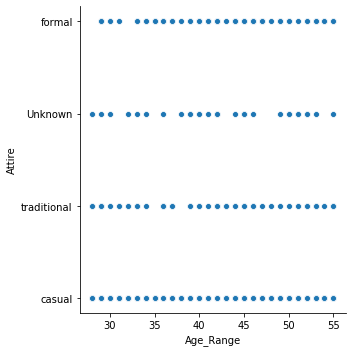

In [76]:
ax = sns.relplot(x="Age_Range", y="Attire", data=cluster)

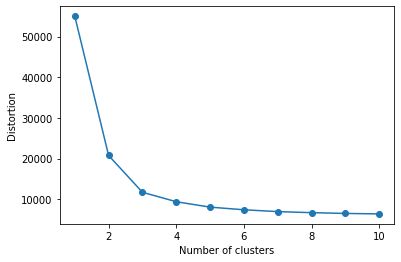

In [77]:
distortions = []

# your codes here...
for i in range(1,11):
    km=KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=300,
        tol=1e-4,
        random_state=0
    )
    km.fit(cluster_dum)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [78]:
km=KMeans(n_clusters=3,random_state=1)
km.fit(cluster_dum)

cluster_vis=cluster.copy()
cluster_vis['label']=km.labels_
cluster_vis

,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Attire,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Time_Of_Day,Age_Group,label
0,Unknown,moderate,42,yes,young,big,casual,short_sleeve,black,short,clothes,3,10,Night,"(40, 50]",1
1,male,thin,32,no,no_kids,big,casual,short_sleeve,blue_jeans,long,Unknown,6,9,Night,"(30, 40]",2
2,female,Unknown,30,no,no_kids,big,casual,short_sleeve,black,long,Unknown,4,10,Night,"(20, 30]",2
3,male,thin,51,no,no_kids,Unknown,casual,short_sleeve,yellow,short,clothes,5,9,Night,"(50, 60]",0
4,male,moderate,34,no,no_kids,big,casual,short_sleeve,white,long,clothes,3,9,Night,"(30, 40]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,female,moderate,45,no,no_kids,small,casual,long sleeve,black,long,clothes,3,10,Night,"(40, 50]",1
803,male,fat,34,no,no_kids,big,casual,short_sleeve,black,long,blankets,3,7,Night,"(30, 40]",2
804,female,moderate,53,no,no_kids,big,traditional,long sleeve,pink,long,clothes,3,7,Night,"(50, 60]",0
805,female,moderate,37,no,no_kids,big,traditional,short_sleeve,black,long,clothes,6,10,Night,"(30, 40]",2


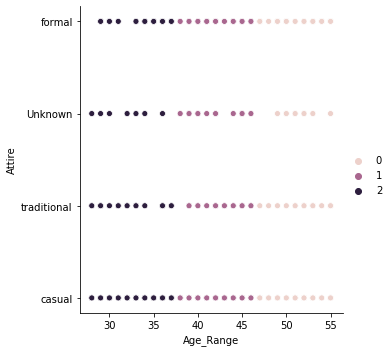

In [79]:
ax = sns.relplot(x="Age_Range", y="Attire", hue=cluster_vis.label.tolist(), data=cluster_vis)

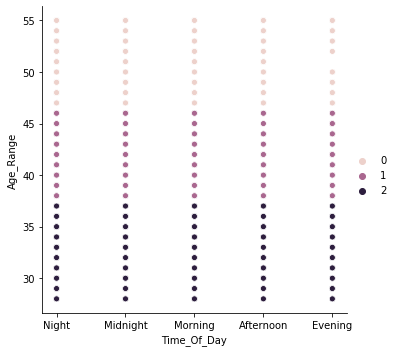

In [81]:
ax = sns.relplot(x="Time_Of_Day", y="Age_Range", hue=cluster_vis.label.tolist(), data=cluster_vis)